<a href="https://colab.research.google.com/github/masolanoo/x-rays/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pre

In [1]:
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# #etiquetas
# ! kaggle datasets download nih-chest-xrays/data -f Data_Entry_2017.zip

# #train_val_list.txt
# ! kaggle datasets download nih-chest-xrays/data -f train_val_list.zip

# #test_list.txt
# ! kaggle datasets download nih-chest-xrays/data -f test_list.zip

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go


Datos de las imágenes

In [5]:
df = pd.read_csv('Data_Entry_2017.csv')
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [6]:
df.shape

(112120, 12)

In [7]:
#encontrar lista de hallazgos/patologías posibles
labels = set() 
for i in pd.unique(df['Finding Labels']):
    labels.update(i.split('|'))

#quitar 'No Finding'
labels.remove('No Finding')

labels = list(labels)

unique_com = len(pd.unique(df['Finding Labels']))
print(f'Así, existen {unique_com} combinaciones de etiquetas únicas \ny {len(labels)} posibles condiciones: {labels}')

#crear nuevas columnas en el dataframe que representen cada una de estas etiquetas
for label in labels:
    df[label] = df['Finding Labels'].apply(lambda x: 1 if label in x else 0)


#revisar dataframe
df.loc[:,['Image Index', 'Finding Labels']+labels]

Así, existen 836 combinaciones de etiquetas únicas 
y 14 posibles condiciones: ['Infiltration', 'Hernia', 'Nodule', 'Pneumothorax', 'Edema', 'Consolidation', 'Fibrosis', 'Emphysema', 'Effusion', 'Atelectasis', 'Pleural_Thickening', 'Pneumonia', 'Cardiomegaly', 'Mass']


,Image Index,Finding Labels,Infiltration,Hernia,Nodule,Pneumothorax,Edema,Consolidation,Fibrosis,Emphysema,Effusion,Atelectasis,Pleural_Thickening,Pneumonia,Cardiomegaly,Mass
0,00000001_000.png,Cardiomegaly,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,00000001_001.png,Cardiomegaly|Emphysema,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,00000001_002.png,Cardiomegaly|Effusion,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,00000002_000.png,No Finding,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,0,0,0,0,0,0,0,0,0,0,0,1,0,1
112116,00030802_000.png,No Finding,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112117,00030803_000.png,No Finding,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112118,00030804_000.png,No Finding,0,0,0,0,0,0,0,0,0,0,0,0,0,0


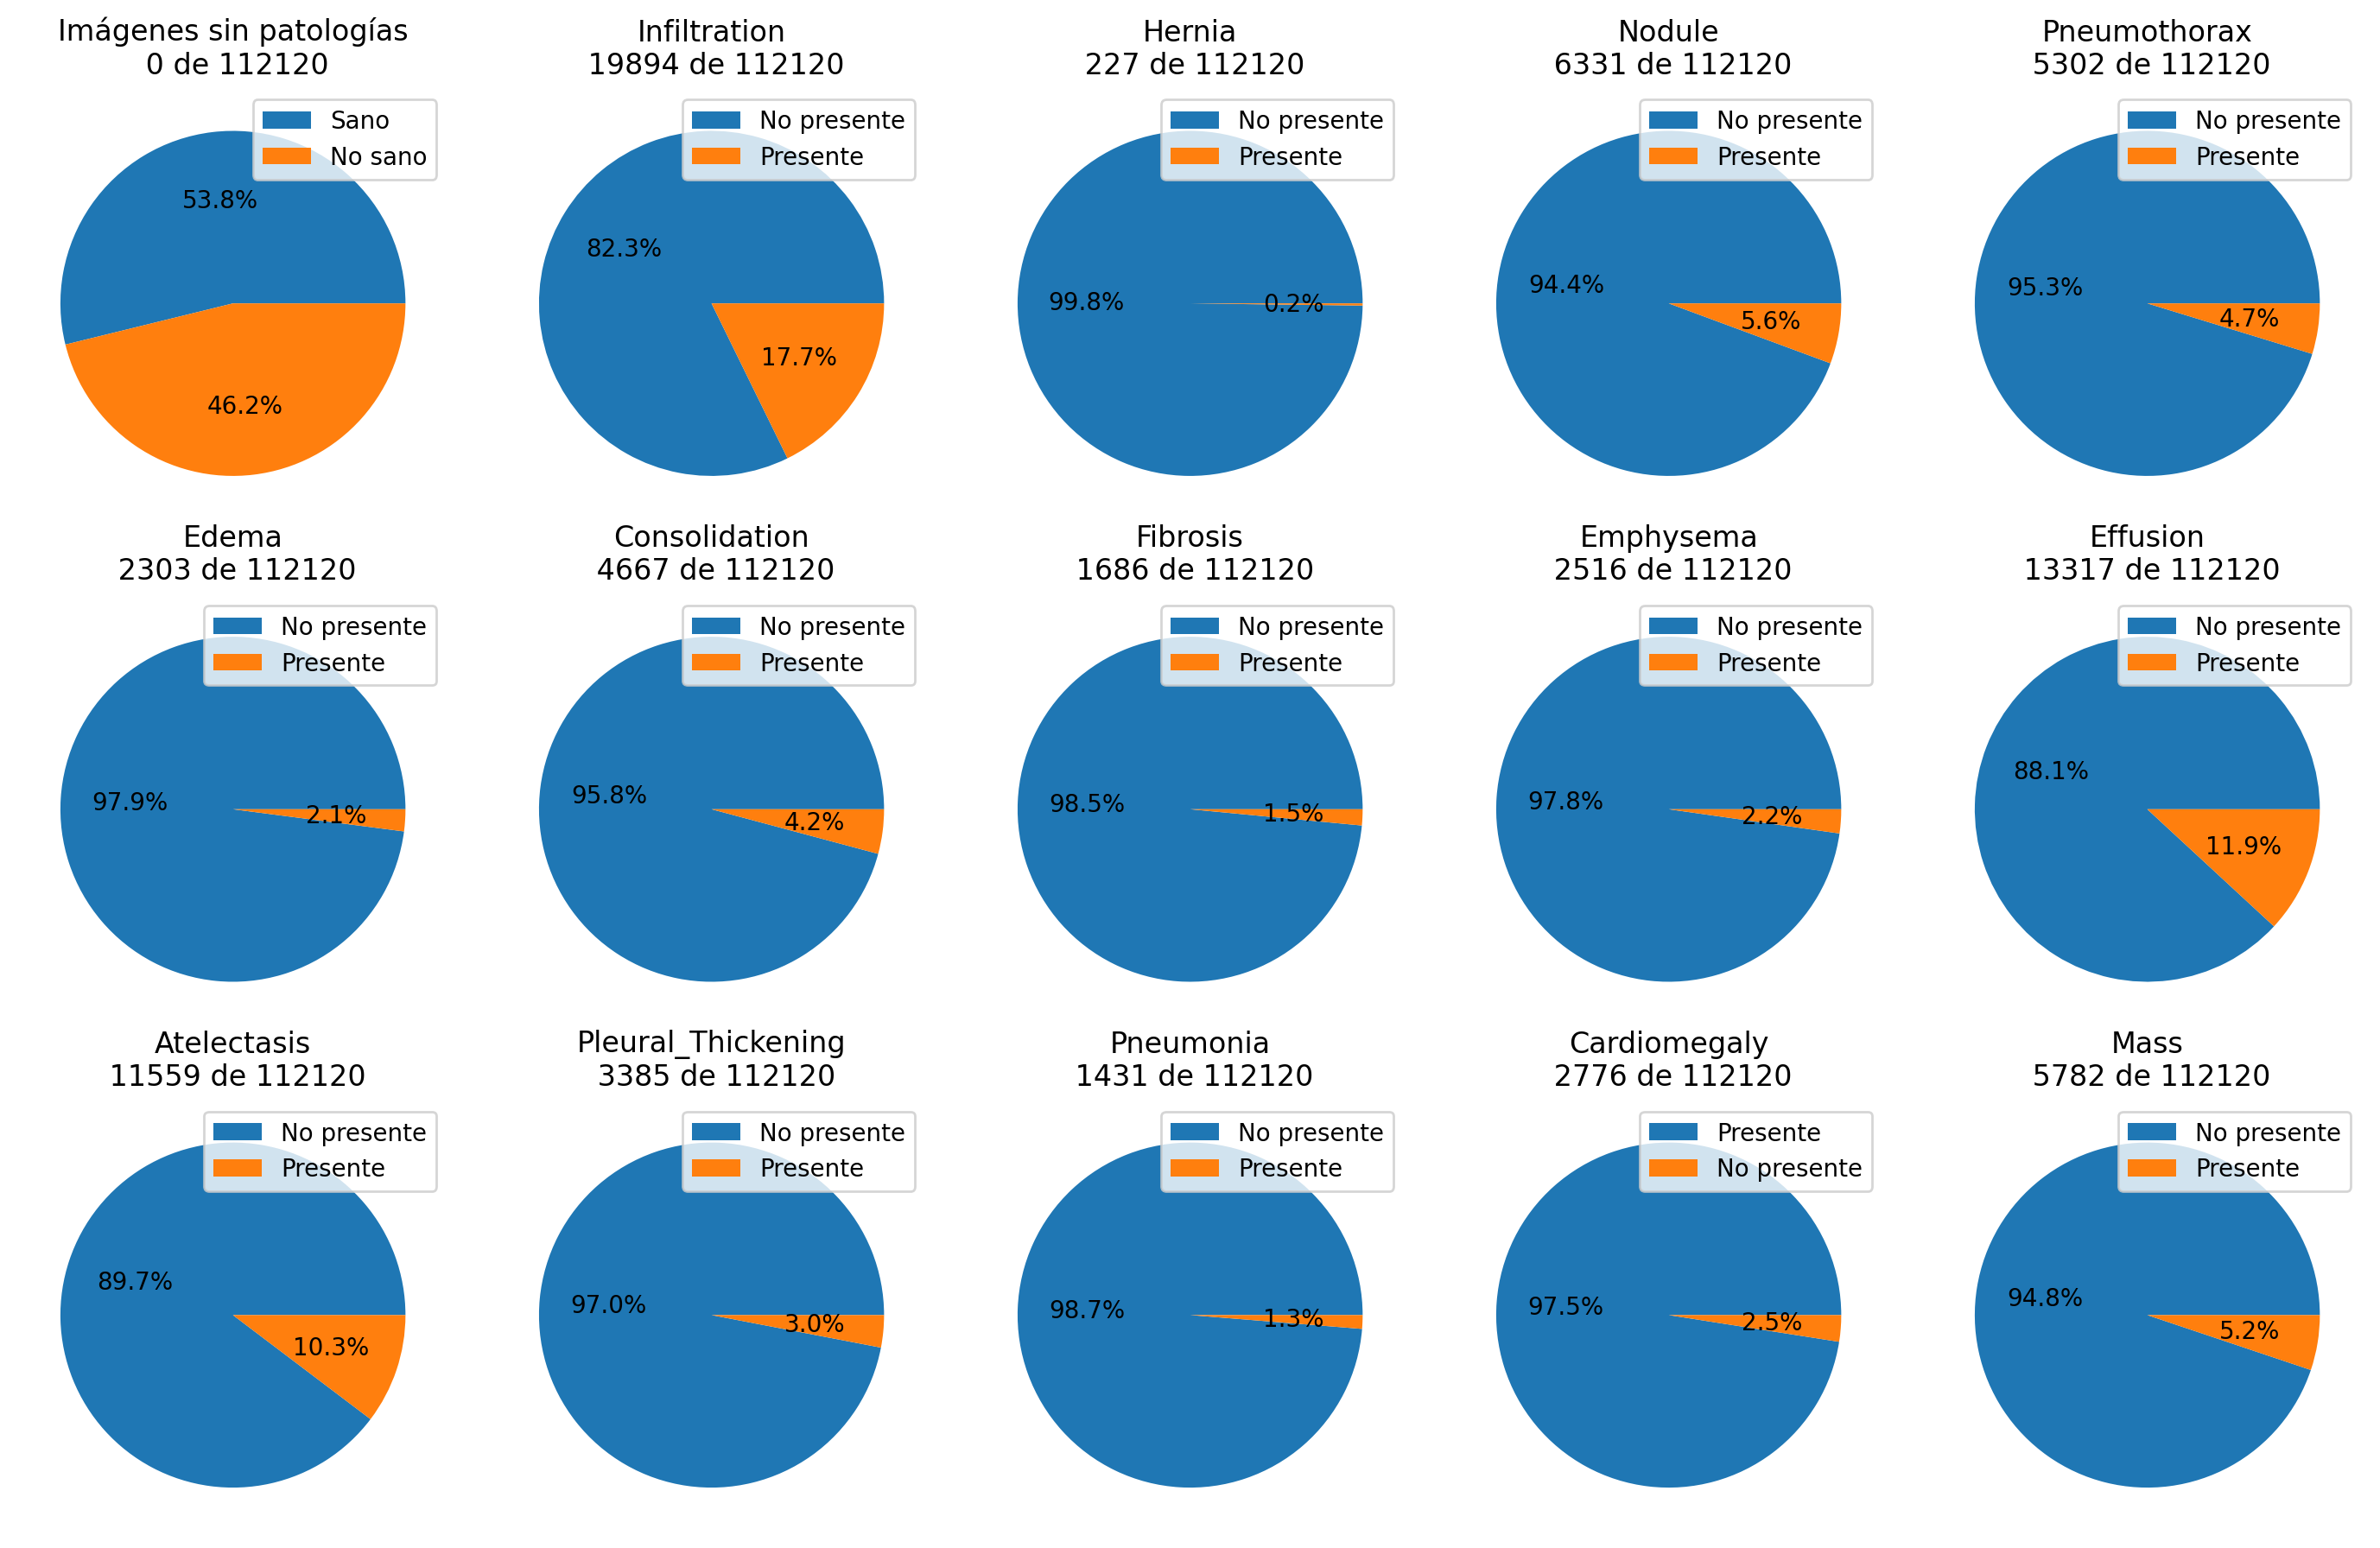

In [8]:
## pie chart

plt.rcParams['figure.dpi'] = 200


plt.figure(figsize=(14,9))
plt.subplot(3,5,1)
plt.pie(x=[len(df[df['Finding Labels'] == 'No Finding']), len(df[df['Finding Labels'] != 'No Finding'])],autopct='%1.1f%%')
plt.legend(['Sano', 'No sano'])
lensano = len(df[df['Finding Labels'] == 'No Finding '])
plt.title('Imágenes sin patologías' + f'\n {lensano} de {len(df)}' )

for i in range(len(labels)):
    plt.subplot(3,5,i+2)
    plt.pie(df[labels[i]].value_counts(),autopct='%1.1f%%')
    plt.legend(['Presente' if x == 1 else 'No presente' for x in df[labels[i]].unique()])
    plt.title(labels[i] + f'\n {len(df[df[labels[i]] == 1])} de {len(df)}')
plt.tight_layout()
plt.show()

El dataset está desbalanceado para todas las categorías, solo para `Effusion`, `Atelectasis` e `Infiltration` supera el 10%.

Contando solo con estas imágenes, no sería bueno utilizar `Accuracy` como métrica de evaluación, pues en caso tal de que no se reconozcan las patologías y todas las predicciones sean de que no hay cierta patología presente, habrá un `accuracy` para un modelo que no está funcionando.

Otras medidas como `f1-score`, o el área bajo la curva ROC (que además permite analizar el funcionamiento del modelo para varios umbrales), podrían ser más apropiadas.




Para tratar con el desbalance, se pueden implementar estrategias como búsquedas en otras bases de datos que contengan las patologías, que a su vez puede ayudar con la generalización del problema; transformaciones simples de la imagen que no impliquen necesariamente reflexiones sobre el eje x o y; y/o implementar una función de pérdida que le dé más peso a las imágenes con patologías y no a las imágenes normales.









In [38]:
##  correlación

# dataframe de solo las patologías:
label_df=df.loc[:,['Image Index']+labels]
# matriz de correlación
label_df.corr().style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).format(precision=4)

,Infiltration,Hernia,Nodule,Pneumothorax,Edema,Consolidation,Fibrosis,Emphysema,Effusion,Atelectasis,Pleural_Thickening,Pneumonia,Cardiomegaly,Mass
Infiltration,1.0000,-0.0038,0.0427,0.0006,0.0942,0.0459,0.0088,0.0004,0.1181,0.0931,0.0204,0.0730,0.0142,0.0140
Hernia,-0.0038,1.0000,-0.0024,-0.0016,-0.0023,-0.0054,0.0075,-0.0015,-0.0037,0.0108,0.0013,0.0002,0.0018,0.0119
Nodule,0.0427,-0.0024,1.0000,0.0076,0.0003,0.0318,0.0225,-0.0071,0.0191,-0.0080,0.0496,-0.0037,-0.0121,0.1013
Pneumothorax,0.0006,-0.0016,0.0076,1.0000,-0.0225,0.0005,0.0001,0.1782,0.0476,0.0314,0.0317,-0.0100,-0.0222,0.0299
Edema,0.0942,-0.0023,0.0003,-0.0225,1.0000,0.0208,-0.0132,-0.0092,0.0621,-0.0034,-0.0020,0.1740,0.0283,0.0029
Consolidation,0.0459,-0.0054,0.0318,0.0005,0.0208,1.0000,0.0032,-0.0005,0.1011,0.1089,0.0287,0.0252,0.0154,0.0746
Fibrosis,0.0088,0.0075,0.0225,0.0001,-0.0132,0.0032,1.0000,-0.0009,-0.0028,0.0111,0.0536,-0.0069,0.0048,0.0100
Emphysema,0.0004,-0.0015,-0.0071,0.1782,-0.0092,-0.0005,-0.0009,1.0000,0.0112,0.0326,0.0264,-0.0049,-0.0071,0.0232
Effusion,0.1181,-0.0037,0.0191,0.0476,0.0621,0.1011,-0.0028,0.0112,1.0000,0.1724,0.0720,0.0243,0.1301,0.0707
Atelectasis,0.0931,0.0108,-0.0080,0.0314,-0.0034,0.1089,0.0111,0.0326,0.1724,1.0000,0.0252,0.0299,0.0158,0.0190


No hay dos patologías que tengan una correlación significativa.

In [37]:
age_label_df = df.loc[:,['Image Index', 'Patient Age', 'Patient Gender']+labels]
age_label_df['Patient Gender'] = age_label_df['Patient Gender'].apply(lambda x: 1 if x == 'F' else 0)
#age_label_df
age_label_df.corr()['Patient Age':'Patient Gender'].style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).format(precision=4)

,Patient Age,Patient Gender,Infiltration,Hernia,Nodule,Pneumothorax,Edema,Consolidation,Fibrosis,Emphysema,Effusion,Atelectasis,Pleural_Thickening,Pneumonia,Cardiomegaly,Mass
Patient Age,1.0000,-0.0198,-0.0193,0.0436,0.0374,-0.0055,-0.0114,-0.0031,0.0426,0.0308,0.0626,0.0724,0.0380,-0.0133,0.0035,0.0265
Patient Gender,-0.0198,1.0000,-0.0089,0.0129,-0.0085,0.0236,0.0123,-0.0027,0.0055,-0.0229,0.0049,-0.0222,-0.0136,-0.0047,0.0302,-0.0214


Ni la edad ni el género suponen una correlación importante para ninguna de las patologías, los valores absolutos para todas están por debajo de 0.1, por lo cual no se considerará en el modelo, a diferencia de [inserte paper], en el cual hubo una mejoría utilizando otras características como sexo o 

,00000001_000.png
0,00000001_001.png
1,00000001_002.png
2,00000002_000.png
3,00000004_000.png
4,00000005_000.png
...,...
86518,00030789_000.png
86519,00030793_000.png
86520,00030795_000.png
86521,00030801_000.png
